In [18]:
"""
Demo 03: Keras Embedding Layer Usage

This demo shows trainees how to:
1. Use Embedding layer to convert word indices to vectors
2. Compare random vs pre-trained embeddings
3. Freeze vs fine-tune embedding weights
4. Integrate embeddings with RNN/LSTM models

Learning Objectives:
- Understand Embedding layer mechanics
- Load and use pre-trained embeddings
- Make decisions about freezing vs fine-tuning

References:
- Written Content: 03-keras-embedding-layer.md
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [19]:

# ============================================================================
# PART 1: Embedding Layer Basics
# ============================================================================

print("=" * 70)
print("PART 1: Understanding Keras Embedding Layer")
print("=" * 70)

print("""
Embedding Layer: Converts word indices to dense vectors

Input:  Word indices (integers)
        [45, 123, 7, 891]  # "I love deep learning"

Output: Dense vectors (embeddings)
        [[0.2, -0.5, 0.8, ...],   # Embedding for word 45
         [0.3, -0.1, 0.7, ...],   # Embedding for word 123
         [0.1,  0.4, 0.2, ...],   # Embedding for word 7
         [0.4, -0.3, 0.9, ...]]   # Embedding for word 891

Essentially a lookup table:
- Row 45 contains the embedding for word 45
- Learnable during training!
""")

# Create simple embedding layer
vocab_size = 1000
embedding_dim = 64
sequence_length = 10

embedding_layer = layers.Embedding(
    input_dim=vocab_size,      # Vocabulary size
    output_dim=embedding_dim,  # Embedding dimension
    input_length=sequence_length  # Optional: max sequence length
)

# Demonstrate input/output shapes
sample_input = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])  # 1 sequence of 10 words
sample_output = embedding_layer(sample_input)

print(f"\nEmbedding Layer Configuration:")
print(f"  Vocabulary size: {vocab_size}")
print(f"  Embedding dimension: {embedding_dim}")
print(f"  Sequence length: {sequence_length}")

print(f"\nInput shape: {sample_input.shape}  (batch_size, sequence_length)")
print(f"Output shape: {sample_output.shape}  (batch_size, sequence_length, embedding_dim)")

# Total parameters
total_params = vocab_size * embedding_dim
print(f"\nTotal parameters: {total_params:,} (vocab_size x embedding_dim)")


PART 1: Understanding Keras Embedding Layer

Embedding Layer: Converts word indices to dense vectors

Input:  Word indices (integers)
        [45, 123, 7, 891]  # "I love deep learning"

Output: Dense vectors (embeddings)
        [[0.2, -0.5, 0.8, ...],   # Embedding for word 45
         [0.3, -0.1, 0.7, ...],   # Embedding for word 123
         [0.1,  0.4, 0.2, ...],   # Embedding for word 7
         [0.4, -0.3, 0.9, ...]]   # Embedding for word 891

Essentially a lookup table:
- Row 45 contains the embedding for word 45
- Learnable during training!


Embedding Layer Configuration:
  Vocabulary size: 1000
  Embedding dimension: 64
  Sequence length: 10

Input shape: (1, 10)  (batch_size, sequence_length)
Output shape: (1, 10, 64)  (batch_size, sequence_length, embedding_dim)

Total parameters: 64,000 (vocab_size x embedding_dim)


In [20]:
# ============================================================================
# PART 2: Embedding as Lookup Table
# ============================================================================

print("\n" + "=" * 70)
print("PART 2: Embedding as Lookup Table")
print("=" * 70)

# Get embedding weights
weights = embedding_layer.get_weights()[0]
print(f"Embedding matrix shape: {weights.shape}")

# Look up specific word embeddings
word_idx = 42
embedding_for_word_42 = weights[word_idx]
print(f"\nEmbedding for word index {word_idx}:")
print(f"  Vector (first 10 dims): {embedding_for_word_42[:10].round(3)}")

# Demonstrate lookup equivalence
manual_lookup = weights[sample_input[0]]  # Manual lookup
keras_lookup = sample_output[0].numpy()   # Keras output

print(f"\nManual lookup matches Keras output: {np.allclose(manual_lookup, keras_lookup)}")



PART 2: Embedding as Lookup Table
Embedding matrix shape: (1000, 64)

Embedding for word index 42:
  Vector (first 10 dims): [ 0.045 -0.049 -0.046  0.042 -0.033 -0.004 -0.009 -0.048  0.039  0.042]

Manual lookup matches Keras output: True


In [21]:

# ============================================================================
# PART 3: Embedding in Complete Model
# ============================================================================

print("\n" + "=" * 70)
print("PART 3: Complete Model with Embedding Layer")
print("=" * 70)

# Sample data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = [
    "I love this movie it is amazing",
    "This film is terrible and boring",
    "Great performance by the actors",
    "Worst movie I have ever seen",
    "Highly recommend this masterpiece"
]
labels = [1, 0, 1, 0, 1]

# Tokenize
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=15)
y = np.array(labels)

print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Padded sequences shape: {X.shape}")

# Build model with embedding
model = keras.Sequential([
    # Embedding layer: Convert indices to vectors
    layers.Embedding(input_dim=1000, output_dim=32, input_length=15),
    
    # LSTM layer: Process sequence
    layers.LSTM(16),
    
    # Output layer: Classification
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\nModel with Embedding Layer:")
model.summary()

# Train
print("\nTraining...")
history = model.fit(X, y, epochs=50, verbose=0)

# Check learned embeddings
learned_embeddings = model.layers[0].get_weights()[0]
print(f"\nLearned embedding matrix shape: {learned_embeddings.shape}")



PART 3: Complete Model with Embedding Layer
Vocabulary size: 23
Padded sequences shape: (5, 15)

Model with Embedding Layer:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training...

Learned embedding matrix shape: (1000, 32)


In [22]:

# ============================================================================
# PART 4: Pre-trained Embeddings (Simulated)
# ============================================================================

print("\n" + "=" * 70)
print("PART 4: Using Pre-trained Embeddings")
print("=" * 70)

print("""
In practice, you'd load real pre-trained embeddings:
- GloVe: glove.6B.100d.txt (400K words, 100 dimensions)
- Word2Vec: GoogleNews-vectors-negative300.bin (3M words, 300 dimensions)

Here we'll simulate pre-trained embeddings for demonstration.
""")

# Simulate pre-trained embeddings
np.random.seed(42)
vocab_size = 1000
embedding_dim = 100

# Create "pre-trained" embedding matrix
pretrained_embeddings = np.random.randn(vocab_size, embedding_dim).astype('float32')

# Make semantically similar words have similar embeddings (simulation)
# In real pre-trained embeddings, similar words naturally have similar vectors
print("Creating simulated pre-trained embeddings...")
print(f"Shape: {pretrained_embeddings.shape}")

# Load pre-trained embeddings into Keras model
model_with_pretrained = keras.Sequential([
    layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[pretrained_embeddings],  # Initialize with pre-trained
        input_length=15,
        trainable=False  # FREEZE: Don't update during training
    ),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

model_with_pretrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_with_pretrained.build((None, 15)) # THIS LINE WAS ADDED TO THE CODE

print("\nModel with Pre-trained Embeddings (FROZEN):")
print(f"Total parameters: {model_with_pretrained.count_params():,}")
print(f"Trainable parameters: {sum([np.prod(v.shape) for v in model_with_pretrained.trainable_weights]):,}")



PART 4: Using Pre-trained Embeddings

In practice, you'd load real pre-trained embeddings:
- GloVe: glove.6B.100d.txt (400K words, 100 dimensions)
- Word2Vec: GoogleNews-vectors-negative300.bin (3M words, 300 dimensions)

Here we'll simulate pre-trained embeddings for demonstration.

Creating simulated pre-trained embeddings...
Shape: (1000, 100)

Model with Pre-trained Embeddings (FROZEN):
Total parameters: 117,057
Trainable parameters: 17,057


In [23]:

# ============================================================================
# PART 5: Freeze vs Fine-tune
# ============================================================================

print("\n" + "=" * 70)
print("PART 5: Freezing vs Fine-tuning Embeddings")
print("=" * 70)

print("""
FROZEN (trainable=False):
  - Embeddings don't change during training
  - Use pre-trained knowledge as-is
  - Fewer trainable parameters, faster training
  - Best when: Small dataset, trust pre-trained embeddings

FINE-TUNABLE (trainable=True):
  - Embeddings update during training
  - Adapts to your specific task
  - Risk of overfitting on small datasets
  - Best when: Large dataset, domain-specific language
""")

# Compare frozen vs fine-tunable
model_frozen = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, weights=[pretrained_embeddings],
                     input_length=15, trainable=False),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

model_finetune = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, weights=[pretrained_embeddings],
                     input_length=15, trainable=True),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

model_frozen.build((None, 15)) # THIS LINE WAS ADDED TO THE CODE
model_finetune.build((None, 15)) # THIS LINE WAS ADDED TO THE CODE

print("\nFrozen Embeddings:")
print(f"  Total params: {model_frozen.count_params():,}")
print(f"  Trainable: {sum([np.prod(v.shape) for v in model_frozen.trainable_weights]):,}")

print("\nFine-tunable Embeddings:")
print(f"  Total params: {model_finetune.count_params():,}")
print(f"  Trainable: {sum([np.prod(v.shape) for v in model_finetune.trainable_weights]):,}")



PART 5: Freezing vs Fine-tuning Embeddings

FROZEN (trainable=False):
  - Embeddings don't change during training
  - Use pre-trained knowledge as-is
  - Fewer trainable parameters, faster training
  - Best when: Small dataset, trust pre-trained embeddings

FINE-TUNABLE (trainable=True):
  - Embeddings update during training
  - Adapts to your specific task
  - Risk of overfitting on small datasets
  - Best when: Large dataset, domain-specific language


Frozen Embeddings:
  Total params: 117,057
  Trainable: 17,057

Fine-tunable Embeddings:
  Total params: 117,057
  Trainable: 117,057


In [24]:

# ============================================================================
# PART 6: Masking Padding Tokens
# ============================================================================

print("\n" + "=" * 70)
print("PART 6: Masking Padding Tokens")
print("=" * 70)

print("""
Problem: Padded sequences contain 0s that shouldn't influence the model

Sequence: [42, 15, 89, 0, 0, 0, 0]  (7 tokens, 3 real words + 4 padding)

Without masking:
  LSTM processes all 7 positions, including padding
  Padding contributes noise to the hidden state

With masking (mask_zero=True):
  LSTM skips positions with value 0
  Only processes real tokens
""")

# Without masking
model_no_mask = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=15),  # No masking
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

# With masking
model_with_mask = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=15, mask_zero=True),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

print("\nWith mask_zero=True:")
print("  - Embedding layer creates mask for 0 values")
print("  - LSTM automatically skips masked positions")
print("  - Cleaner gradient flow, potentially better performance")



PART 6: Masking Padding Tokens

Problem: Padded sequences contain 0s that shouldn't influence the model

Sequence: [42, 15, 89, 0, 0, 0, 0]  (7 tokens, 3 real words + 4 padding)

Without masking:
  LSTM processes all 7 positions, including padding
  Padding contributes noise to the hidden state

With masking (mask_zero=True):
  LSTM skips positions with value 0
  Only processes real tokens


With mask_zero=True:
  - Embedding layer creates mask for 0 values
  - LSTM automatically skips masked positions
  - Cleaner gradient flow, potentially better performance



PART 7: Visualizing Learned Embeddings

 Embedding visualization saved


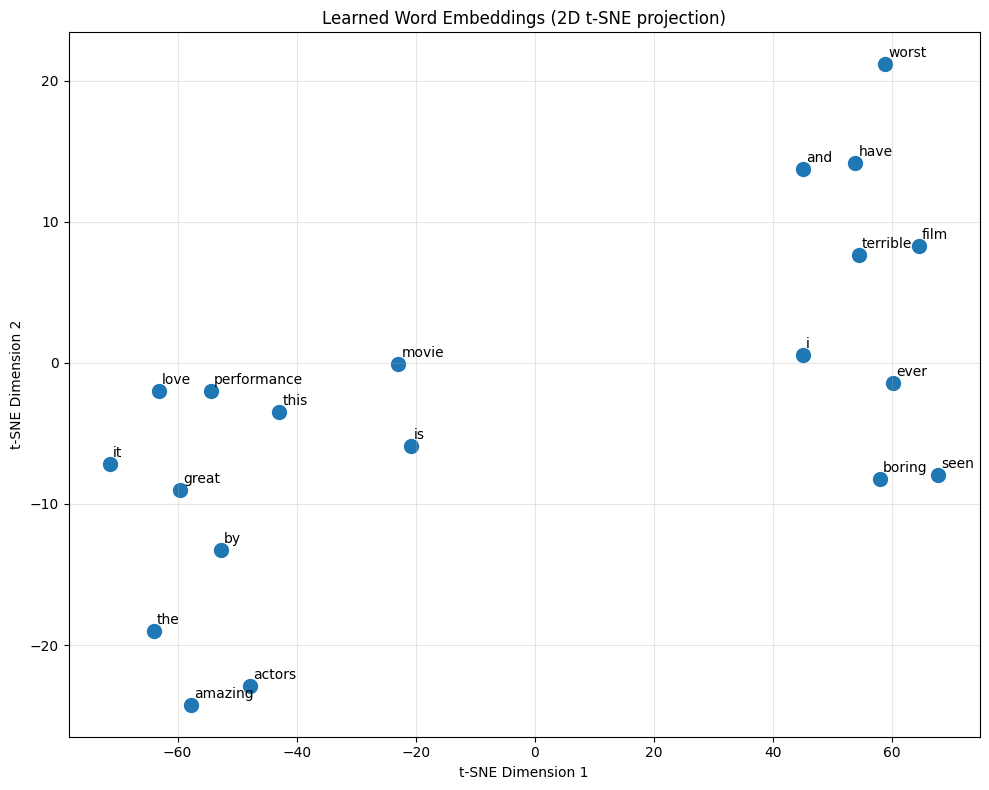

In [25]:

# ============================================================================
# PART 7: Visualizing Learned Embeddings
# ============================================================================

print("\n" + "=" * 70)
print("PART 7: Visualizing Learned Embeddings")
print("=" * 70)

from sklearn.manifold import TSNE

# Get some word embeddings from our trained model
embedding_weights = model.layers[0].get_weights()[0]

# Get words and their indices
word_index = tokenizer.word_index
words = list(word_index.keys())[:20]  # First 20 words
indices = [word_index[w] for w in words]

# Get embeddings for these words
word_embeddings = embedding_weights[indices]

# Reduce to 2D with t-SNE
if len(words) > 5:  # Need enough words for t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(words)-1))
    embeddings_2d = tsne.fit_transform(word_embeddings)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=100)
    
    for i, word in enumerate(words):
        plt.annotate(word, (embeddings_2d[i, 0] + 0.5, embeddings_2d[i, 1] + 0.5), fontsize=10)
    
    plt.title('Learned Word Embeddings (2D t-SNE projection)')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('learned_embeddings.png', dpi=150)
    print("\n Embedding visualization saved")
else:
    print("\nNot enough words for t-SNE visualization")


In [26]:
# ============================================================================
# DEMO SUMMARY
# ============================================================================

print("\n" + "=" * 70)
print("DEMO COMPLETE: Embedding Layer Usage")
print("=" * 70)

print("\nKey Takeaways:")
print("1. Embedding layer = lookup table (index -> vector)")
print("2. Input: (batch, seq_len), Output: (batch, seq_len, embed_dim)")
print("3. Parameters = vocab_size x embedding_dim")
print("4. Pre-trained embeddings: Use weights= parameter")
print("5. Frozen (trainable=False): Don't update, use pre-trained knowledge")
print("6. Fine-tune (trainable=True): Adapt to your task")
print("7. mask_zero=True: Ignore padding in RNN/LSTM")

print("\nDecision Guide:")
print("- Small dataset + general domain: Freeze pre-trained")
print("- Large dataset + domain-specific: Fine-tune")
print("- No pre-trained available: Train from scratch")

print("\n" + "=" * 70)




DEMO COMPLETE: Embedding Layer Usage

Key Takeaways:
1. Embedding layer = lookup table (index -> vector)
2. Input: (batch, seq_len), Output: (batch, seq_len, embed_dim)
3. Parameters = vocab_size x embedding_dim
4. Pre-trained embeddings: Use weights= parameter
5. Frozen (trainable=False): Don't update, use pre-trained knowledge
6. Fine-tune (trainable=True): Adapt to your task
7. mask_zero=True: Ignore padding in RNN/LSTM

Decision Guide:
- Small dataset + general domain: Freeze pre-trained
- Large dataset + domain-specific: Fine-tune
- No pre-trained available: Train from scratch

